<font size="18">Task 1:Quantum Computing part</font>

In this there are 2 subtask we have to perform

We will be using cirq library for implementation

We will start by importing cirq and numpy

In [1]:
import cirq
import numpy as np

<font size="6">First Subtask</font>

First create 5 qubits using LineQubit which will create 5 qubits ie q0, q1,q2,q3,q4

In [2]:
qubits = [cirq.LineQubit(i) for i in range(5)]

Now we will first create a circuit and then append all the 5 qubits in the circuit by applying Hadamard gate to each qubit

In [3]:
circuit = cirq.Circuit()

circuit.append([cirq.H(q) for q in qubits])

Now we have to apply controlled not (CNOT) on  (0,1), (1,2), (2,3), (3,4)

In [4]:
circuit.append([cirq.CNOT(qubits[i], qubits[i+1]) for i in range(4)])

Now we will swap q0 and q4 using SWAP gate 

In [5]:
circuit.append(cirq.SWAP(qubits[0], qubits[4]))

Now we have to rotate X any qubit lets say q1 by pi/2

In [6]:
circuit.append(cirq.rx(np.pi/2)(qubits[1]))

Plot the circuit

In [7]:
print("Circuit diagram:")
print(circuit)


Circuit diagram:
0: ───H───@──────────────────────×───
          │                      │
1: ───H───X───@───Rx(0.5π)───────┼───
              │                  │
2: ───H───────X───@──────────────┼───
                  │              │
3: ───H───────────X──────────@───┼───
                             │   │
4: ───H──────────────────────X───×───


For better visualization we can use SVGcirciuts

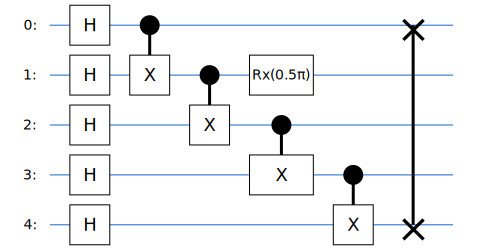

In [8]:
from cirq.contrib.svg import SVGCircuit
from IPython.display import display, SVG
display(SVGCircuit(circuit))


<font size="6">Second Subtask</font>

We will be using cirq library for this task 

In this task we will be using 5 qubits ie 4 normal qubits and one ancilla qubit 

### Role of ancilla qubit:
The ancilla qubit is used as a control mechanism that is used to check similarity between quantum states without measuring them 
If we measure the qubits it would collapse there superposition 

## Steps of the Swap Test

### 1. Initialize the Ancilla in |0⟩
- The ancilla qubit starts in **|0⟩**.

### 2. Apply Hadamard (H) on the Ancilla
- This puts the ancilla in an **equal superposition**:
  
  $$
|+\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}}
  $$


### 3. Controlled SWAP (CSWAP) Operations
- The ancilla controls the **swap** of qubit pairs (`q1, q2`) and (`q3, q4`).
- If the ancilla is **|0⟩**, nothing happens.
- If the ancilla is **|1⟩**, the qubits swap.
- This **entangles the ancilla** with the similarity of the states.

### 4. Apply Hadamard Again to the Ancilla
- This transforms the ancilla back to a **new superposition** based on how much the states differ.

### 5. Measure the Ancilla
- **If the ancilla is |0⟩**, the states are **similar** (higher probability).
- **If the ancilla is |1⟩**, the states are **different** (higher probability).


Create 5 qubits 

In [9]:
qubits = [cirq.LineQubit(i) for i in range(5)]
q1,q2,q3,q4,ancilla = qubits

Create a empty circuit

In [10]:
circuit = cirq.Circuit()

Apply hadmard gate to q1,q3,q4 and rotate q2 x by pi/3

In [11]:
circuit.append(cirq.H(q1))
circuit.append(cirq.rx(np.pi/3)(q2))
circuit.append([cirq.H(q3), cirq.H(q4)])

Add the ancilla qubit to the circuit for swap test 

In [12]:
circuit.append(cirq.H(ancilla))

Use controlled swap gate (CSWAP) for q1,q2 and q3,q4

In [13]:
circuit.append(cirq.CSWAP(ancilla, q1, q2))
circuit.append(cirq.CSWAP(ancilla, q3, q4))

Finalizing the swap test we have to apply H gate on ancilla

In [14]:
circuit.append(cirq.H(ancilla))

Print the circuit

In [15]:
print("Circuit diagram:")
print(circuit)

Circuit diagram:
0: ───H────────────×───────────
                   │
1: ───Rx(0.333π)───×───────────
                   │
2: ───H────────────┼───×───────
                   │   │
3: ───H────────────┼───×───────
                   │   │
4: ───H────────────@───@───H───


For better visualization

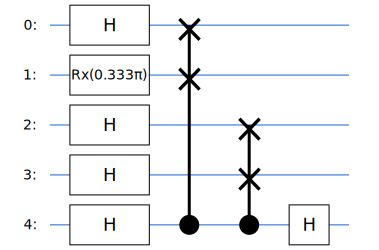

In [16]:
display(SVGCircuit(circuit))